# Nadia Richer

---

## Research Question

How does the number of children an individual has influence their insurance charges?

### Context
I plan to examine the relationship between number of children and insurance charges. I want to do this by analyzing this relationship in a general context, as well as combined with other variables like age and gender. I am interested in whether insurance charges based on children are similar in men and women, or if there are identifiable differences. I am also curious about how insurance charges differ between age groups, based on number of children.


### Rough Analysis Plan
1. Identifying research question and key variables
- Key variables will include number of children, age, gender, and insurance charges. Identifying these will allow me to clean the data effectively. 
2. Data cleaning
- Remove any NaN values from the dataset.
- Remove any irrelevant data or outliers. 
- Drop columns that are irrelevant to my analysis.
    - Including BMI, smoker, and region 
3. Shaping data by adding new columns, calculations, etc.
- Calculations may include:
    - Percentage of male vs. female with 1 child, 2 children, 3 children, etc.
    - Percentage of 10 year-age increments with 1 child, 2 children, 3 children, etc.
- New columns may include:
    - Number of children by gender
    - Number of children by age increments
4. Exploring different plots to visualize my data and relationships
- I will use the Seaborn tutorial and experience from Lab 5 to start thinking about how I can effectively answer my research question through the use of plots.

---
# Exploratory Data Analysis (Milestone 3)

### Task 1: Conduct an EDA

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("../data/raw/insurance.csv")
df

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,male,30.970,3,no,northwest,10600.54830
1334,1334,18,female,31.920,0,no,northeast,2205.98080
1335,1335,18,female,36.850,0,no,southeast,1629.83350
1336,1336,21,female,25.800,0,no,southwest,2007.94500


Text(0, 0.5, 'Insurance Charges')

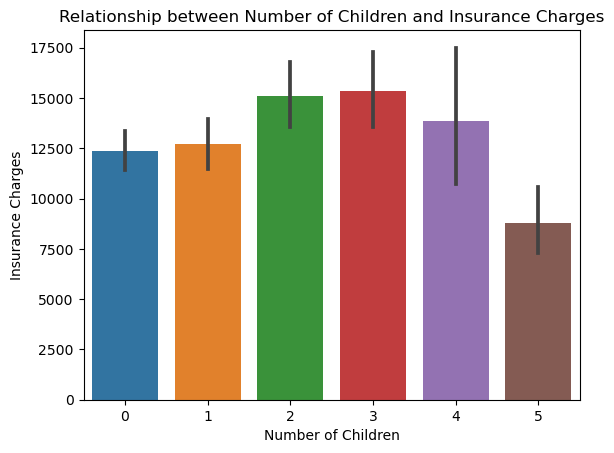

In [ ]:
bplot = sns.barplot(data=df,y="charges",x="children")
bplot.set_title("Relationship between Number of Children and Insurance Charges")
bplot.set_xlabel("Number of Children")
bplot.set_ylabel("Insurance Charges")

#### Observations
- People with 0 children do not have the lowest charges.
    - This contradicts my personal understanding. I would think that those individuals with no children would have the lowest charges. There must be some mediating factors here. 
- There is only a very slight increase in charges when an individual has 1 child versus no children. 
- There is a sharp increase in charges when an individual has another child (2 children).
- After 3 children, charges begin to decline.
    - This contradicts my personal understanding. I would think that insurance charges continue increasing with the number of children. There must be some mediating factors here. 

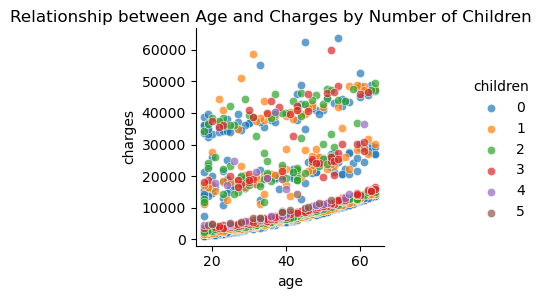

In [ ]:
fgrid = sns.FacetGrid(data=df, hue="children")
fgrid.map(sns.scatterplot, "age" ,"charges", alpha=.7)
fgrid.add_legend()
fgrid.fig.suptitle("Relationship between Age and Charges by Number of Children")
fgrid.fig.subplots_adjust(top=0.92)

#### Observations
- When considering age, more linear relationships begin to appear. 
- Age appears to be a more relevant indicator of higher charges than number of children. 
- Number of children appears to be randomly scattered, and does not seem to be an indicator of any solid relationship with increased charges. 

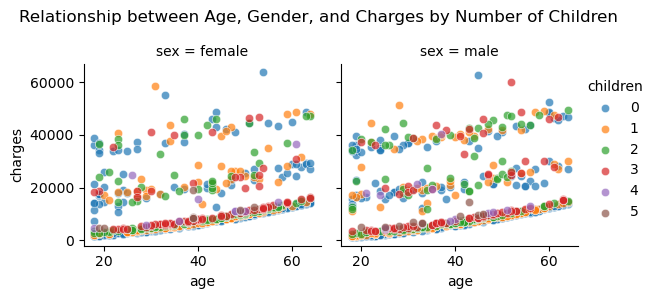

In [ ]:
fgrid_sex = sns.FacetGrid(data=df, col="sex", hue="children")
fgrid_sex.map(sns.scatterplot, "age" ,"charges", alpha=.7)
fgrid_sex.add_legend()
fgrid_sex.fig.suptitle("Relationship between Age, Gender, and Charges by Number of Children")
fgrid_sex.fig.subplots_adjust(top=0.80)

#### Observations
- This scatterplot is a replication of the plot above, but now separated by sex to see if there are any differences.
- There does not appear to be any notable differences between sexes in this relationship.
    - Females and males have consistent charges in relation to their age and number of children.
- After considering sex, age remains the most relevant indicator of higher charges.

### Task 2: Refine your Research Question

After doing an EDA, I believe my research question is still viable. However, in my original research question context, I stated that I would likely only consider age and sex, and drop the other columns. After doing a bit of EDA, I realized this would not give my research question enough breadth for an entire project.

While I don't think I will change my research question at this point, I will amend my rough analysis plan. The dataset we chose is already very clean, and I think I will consider all columns including age, sex, smoker, region, and BMI. 

## Changes to Analysis Plan
1. Identifying research question and key variables
- Key variables will include number of children, age, gender, and insurance charges. Identifying these will allow me to clean the data effectively. 
2. Data cleaning
- Remove any NaN values from the dataset. 
- Remove any irrelevant data or outliers. 
- Drop any columns irrelevant to my analysis. 
    - **Will no longer be dropping smoker, region, and BMI columns as my research context needs more breadth.**
3. Shaping data by adding new columns, calculations, etc.
- Calculations may include:
    - Percentage of male vs. female with 1 child, 2 children, 3 children, etc.
    - Percentage of 10 year-age increments with 1 child, 2 children, 3 children, etc.
- New columns may include:
    - Number of children by gender
    - Number of children by age increments 
4. Exploring different plots to visualize my data and relationships
- I will use the Seaborn tutorial and experience from Lab 5 to start thinking about how I can effectively answer my research question through the use of plots.
- **Use of FacetGrids to plot multiple variables on the same grids.**

---
# Visualizations, Analysis, and Pipeline (Milestone 4)

### Task 1: Set up an Analysis Pipeline

#### 1.1 Load Data

In [ ]:
df

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,male,30.970,3,no,northwest,10600.54830
1334,1334,18,female,31.920,0,no,northeast,2205.98080
1335,1335,18,female,36.850,0,no,southeast,1629.83350
1336,1336,21,female,25.800,0,no,southwest,2007.94500


#### 1.2 Clean Data

In [ ]:
df.dropna(subset = ["age","sex","bmi","children","smoker","region","charges"])
df

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,male,30.970,3,no,northwest,10600.54830
1334,1334,18,female,31.920,0,no,northeast,2205.98080
1335,1335,18,female,36.850,0,no,southeast,1629.83350
1336,1336,21,female,25.800,0,no,southwest,2007.94500


The dataset appears to be very clean, and did not have any NaN values in any columns. 

#### 1.3 Process Data

In [ ]:
#df["charge per child"]=(df["charges"]/df["children"])
df
# inf values indicate charges do not relate to number of children

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,male,30.970,3,no,northwest,10600.54830
1334,1334,18,female,31.920,0,no,northeast,2205.98080
1335,1335,18,female,36.850,0,no,southeast,1629.83350
1336,1336,21,female,25.800,0,no,southwest,2007.94500


#### 1.4 Wrangle Data

Restructuring the dataset is not necessary as it is very clean and well-organized.

#### Gaining a deeper understanding of the data

In [ ]:
df["charges"].mean()

13270.422265141257

In [ ]:
df["charges"].max()

63770.42801

In [ ]:
df["charges"].min()

1121.8739

In [ ]:
df.groupby(["sex","children"]).count()

index  age  bmi  smoker  region  charges
sex    children                                          
female 0           289  289  289     289     289      289
       1           158  158  158     158     158      158
       2           119  119  119     119     119      119
       3            77   77   77      77      77       77
       4            11   11   11      11      11       11
       5             8    8    8       8       8        8
male   0           285  285  285     285     285      285
       1           166  166  166     166     166      166
       2           121  121  121     121     121      121
       3            80   80   80      80      80       80
       4            14   14   14      14      14       14
       5            10   10   10      10      10       10

### Task 2: Method Chaining

#### 2.1 Build and test the method chain

In [ ]:
import pandas as pd
import numpy as np
data=df

In [ ]:
cleandf = (   
    df
    .drop_duplicates()
    .dropna(subset = ["age","sex","bmi","children","smoker","region","charges"])
    .reset_index(drop=True)
    .drop(df[df["children"]<1].index)
    # drop rows of individuals with no children
    .assign(charge_per_child= (lambda x: x['charges'] / x['children'])).sort_values("charges",ascending=True).reset_index(drop=True)
    # sorted by lowest charges
    .rename(columns={"children":"number_of_children"})
)
cleandf

,index,age,sex,bmi,number_of_children,smoker,region,charges,charge_per_child
0,1023,18,male,23.320,1,no,southeast,1711.02680,1711.02680
1,270,18,male,29.370,1,no,southeast,1719.43630,1719.43630
2,1283,18,male,30.030,1,no,southeast,1720.35370,1720.35370
3,1,18,male,33.770,1,no,southeast,1725.55230,1725.55230
4,710,18,male,35.200,1,no,southeast,1727.54000,1727.54000
...,...,...,...,...,...,...,...,...,...
759,1062,59,male,41.140,1,yes,southeast,48970.24760,48970.24760
760,1241,64,male,36.960,2,yes,southeast,49577.66240,24788.83120
761,34,28,male,36.400,1,yes,southwest,51194.55914,51194.55914
762,577,31,female,38.095,1,yes,northeast,58571.07448,58571.07448


#### 2.3 Wrap your method chain in a function

In [ ]:
def load_and_process(path="../data/raw/insurance.csv"):

    # Method Chain 1 (Load data and deal with missing data)

    df1 = (
        pd.read_csv("../data/raw/insurance.csv")
        .drop_duplicates()
        .dropna(subset = ["age","sex","bmi","children","smoker","region","charges"])
        .reset_index(drop=True)
        .drop(df[df["children"]<1].index)
    )

    # Method Chain 2 (Create new columns, drop others, and do processing)

    df2 = (
        df1
        .assign(charge_per_child= (lambda x: x['charges'] / x['children'])).sort_values("charges",ascending=True).reset_index(drop=True)
        .rename(columns={"children":"number_of_children"})
        .reset_index(drop=True)
        
      )

    # Make sure to return the latest dataframe

    return df2 


#### 3.3 Move your function to a .py file

In [ ]:
from typing import TYPE_CHECKING
if TYPE_CHECKING:
    from .code import project_functions3
else:
    import sys
    sys.path.append("./code")
    import project_functions3

### Task 3: Conduct your Data Analysis

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('pastel')

analysis_df=cleandf #df from method chaining
analysis_df

,index,age,sex,bmi,number_of_children,smoker,region,charges,charge_per_child
0,1023,18,male,23.320,1,no,southeast,1711.02680,1711.02680
1,270,18,male,29.370,1,no,southeast,1719.43630,1719.43630
2,1283,18,male,30.030,1,no,southeast,1720.35370,1720.35370
3,1,18,male,33.770,1,no,southeast,1725.55230,1725.55230
4,710,18,male,35.200,1,no,southeast,1727.54000,1727.54000
...,...,...,...,...,...,...,...,...,...
759,1062,59,male,41.140,1,yes,southeast,48970.24760,48970.24760
760,1241,64,male,36.960,2,yes,southeast,49577.66240,24788.83120
761,34,28,male,36.400,1,yes,southwest,51194.55914,51194.55914
762,577,31,female,38.095,1,yes,northeast,58571.07448,58571.07448


#### **Research question**: How does the number of children an individual has influence their insurance charges?

To answer my research question, I will complete the following:
1. Analyze the basic relationship between number of children and charges.
1. Analyze the relationship, considering sex.
1. Analyze the relationship, considering BMI.
1. Analyze the relationship, considering age.
1. Analyze the relationship, considering region. 

By analyzing these points, I will be able to identify how number of children influences charges related to other variables, and determine whether number of children is a significant variable in determining insurance charges. 

#### Analyze the basic relationship between number of children and charges.

Text(0, 0.5, 'Insurance Charges')

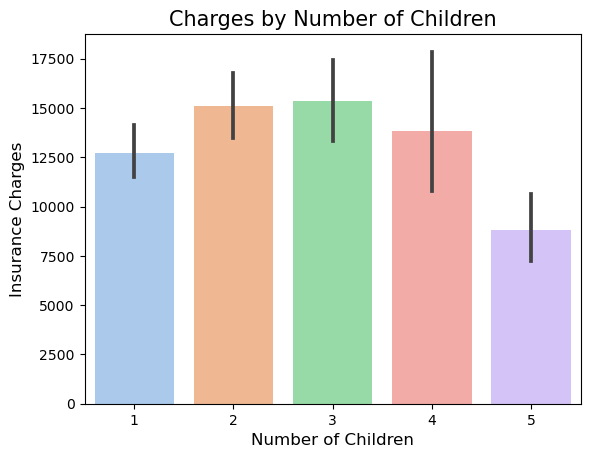

In [ ]:
barplot=sns.barplot(data=analysis_df, y='charges', x='number_of_children')
plt.title('Charges by Number of Children',fontsize=15)
plt.xlabel('Number of Children',fontsize=12)
plt.ylabel('Insurance Charges',fontsize=12)

### Analyze the relationship, considering sex.

Text(46.37594444444443, 0.5, 'Insurance Charges')

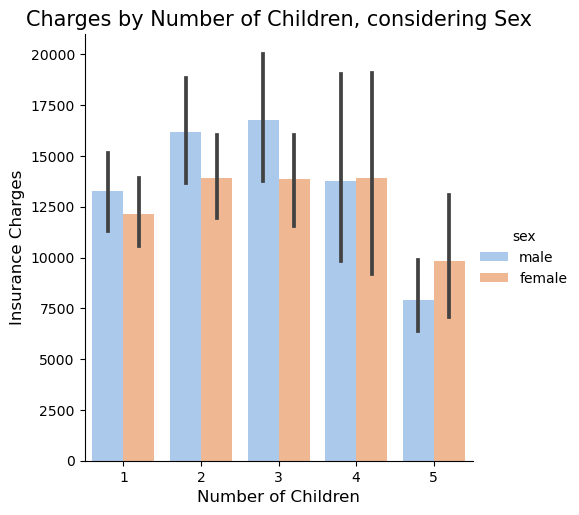

In [ ]:
boxplot=sns.catplot(data=analysis_df,x='number_of_children',y='charges',hue='sex',kind='bar')
plt.title('Charges by Number of Children, considering Sex',fontsize=15)
plt.xlabel('Number of Children',fontsize=12)
plt.ylabel('Insurance Charges',fontsize=12)

### Analyze the relationship, considering BMI.

(0.0, 60000.0)

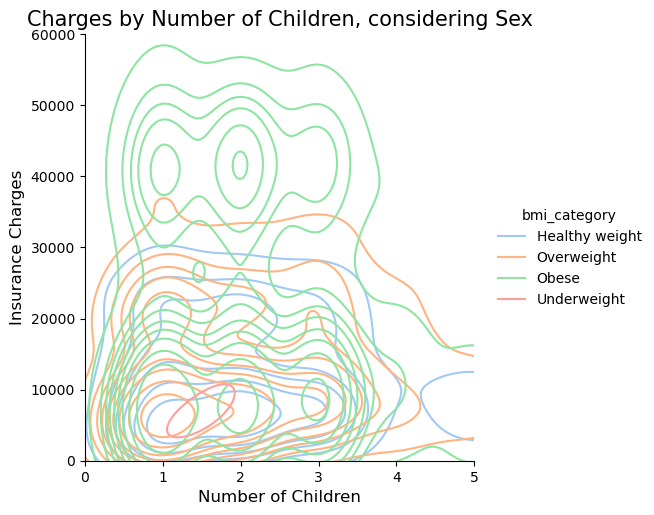

In [ ]:
# To group BMI values as categories
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Healthy weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'
analysis_df['bmi_category']=analysis_df['bmi'].apply(bmi_category)

#To create the graph
lineplot=sns.displot(
    data=analysis_df,
    x='number_of_children',
    y='charges',
    hue='bmi_category',
    kind='kde'
)
plt.title('Charges by Number of Children, considering Sex',fontsize=15)
plt.xlabel('Number of Children',fontsize=12)
plt.ylabel('Insurance Charges',fontsize=12)
plt.xlim(0,5)
plt.ylim(0,60000)